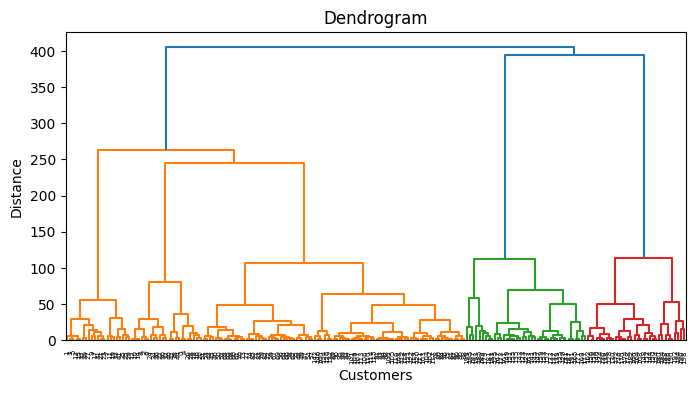

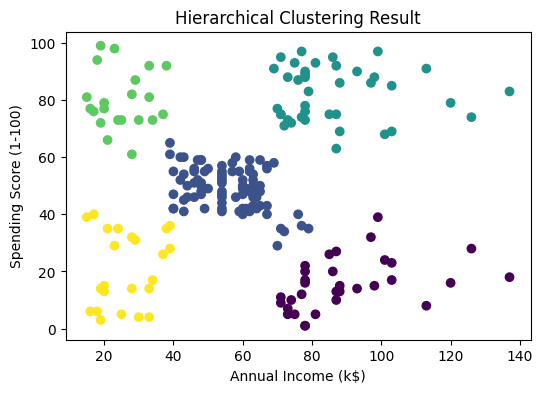

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [25]:
# ALL-IN-ONE CELL : Hierarchical Clustering Model

import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("Mall_Customers (2).csv")

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -------- DENDROGRAM --------
plt.figure(figsize=(8,4))
dendrogram(linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# -------- CREATE MODEL --------
model = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)

# Train model
df['Cluster'] = model.fit_predict(X)

# -------- SAVE MODEL --------
with open("hierarchical_model.pkl", "wb") as f:
    pickle.dump(model, f)

# -------- VISUALIZATION --------
plt.figure(figsize=(6,4))
plt.scatter(
    X.iloc[:,0],
    X.iloc[:,1],
    c=df['Cluster']
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering Result")
plt.show()

# -------- SAVE OUTPUT --------
df.to_csv("clustered_customers.csv", index=False)

df.head()
